In [2]:
import pandas as pd
train_df=pd.read_excel(r"C:\Users\aasha\Downloads\Data_Train.xlsx")

In [3]:
test_df=pd.read_excel(r"C:\Users\aasha\Downloads\Test_set.xlsx")

In [4]:
train_df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


In [5]:
test_df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info


In [6]:
train_lists=train_df.to_dict(orient='records')
test_lists=test_df.to_dict(orient='records')

In [7]:
combined_lists=train_lists + test_lists

In [8]:
final_df=pd.DataFrame(combined_lists)

In [9]:
final_df.tail(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
13353,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [10]:
final_df['Date_of_Journey'].str.split('/').str[1]

0        03
1        05
2        06
3        05
4        03
         ..
13349    06
13350    03
13351    03
13352    03
13353    06
Name: Date_of_Journey, Length: 13354, dtype: object

In [11]:
final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]

In [12]:
final_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [13]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)

In [14]:
final_df['Dep_hour']=final_df['Dep_Time'].str.split(':').str[0]

In [15]:
final_df['Dep_min']=final_df['Dep_Time'].str.split(':').str[1]

In [16]:
final_df['Arrival_hour']=final_df['Arrival_Time'].str.split(':').str[0]

In [17]:
final_df['Arrival_Time'].str.split(':').str[1].str.split(' ').str[0]

0        10
1        15
2        25
3        30
4        35
         ..
13349    25
13350    55
13351    25
13352    15
13353    15
Name: Arrival_Time, Length: 13354, dtype: object

In [18]:
final_df['Arrival_min']=final_df['Arrival_Time'].str.split(':').str[1].str.split(' ').str[0]

In [19]:
final_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019,05,50,13,15


In [20]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [21]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, 'nan':1, '4 stops':4})

In [22]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897.0,24,03,2019,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662.0,1,05,2019,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882.0,9,06,2019,09,25,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218.0,12,05,2019,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302.0,01,03,2019,16,50,21,35


In [23]:
final_df['Duration_hour']=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [24]:
final_df['Duration_minute']=final_df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [25]:
final_df['Duration_minute'].isnull().sum()

1286

In [26]:
final_df['Duration_minute'].fillna(0,inplace=True)

In [27]:
final_df['Duration_minute'].isnull().sum()

0

In [28]:
final_df['Duration_minute'].astype(int)

0        50
1        25
2         0
3        25
4        45
         ..
13349    55
13350    35
13351    35
13352    15
13353    20
Name: Duration_minute, Length: 13354, dtype: int32

In [29]:
final_df = final_df[final_df['Duration'] != '5m']

In [30]:
final_df['Duration_hour'].astype(int)

0         2
1         7
2        19
3         5
4         4
         ..
13349    23
13350     2
13351     6
13352    15
13353    14
Name: Duration_hour, Length: 13352, dtype: int32

In [31]:
final_df['Duration_hour'] = final_df['Duration_hour'].astype(int)
final_df['Duration_minute'] = final_df['Duration_minute'].astype(int)

In [32]:
final_df['Duration_min']=final_df['Duration_hour']*60 + final_df['Duration_minute']

In [33]:
final_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minute,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897.0,24,03,2019,22,20,01,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662.0,1,05,2019,05,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882.0,9,06,2019,09,25,04,25,19,0,1140


In [34]:
final_df.drop('Dep_Time',axis=1,inplace=True)

In [35]:
final_df.drop('Arrival_Time',axis=1,inplace=True)

In [36]:
final_df.drop('Duration',axis=1,inplace=True)

In [37]:
final_df.drop('Duration_hour',axis=1,inplace=True)

In [38]:
final_df.drop('Duration_minute',axis=1,inplace=True)

In [39]:
final_df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897.0,24,03,2019,22,20,01,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662.0,1,05,2019,05,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882.0,9,06,2019,09,25,04,25,1140


In [40]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()


In [41]:
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])

In [42]:
final_df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [43]:
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])

In [44]:
final_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min
0,3,0,5,BLR → DEL,0.0,8,3897.0,24,03,2019,22,20,01,10,170
1,1,3,0,CCU → IXR → BBI → BLR,2.0,8,7662.0,1,05,2019,05,50,13,15,445
2,4,2,1,DEL → LKO → BOM → COK,2.0,8,13882.0,9,06,2019,09,25,04,25,1140
3,3,3,0,CCU → NAG → BLR,1.0,8,6218.0,12,05,2019,18,05,23,30,325
4,3,0,5,BLR → NAG → DEL,1.0,8,13302.0,01,03,2019,16,50,21,35,285


In [45]:
final_df.shape

(13352, 15)

In [46]:
import numpy as np
numeric_df = final_df.select_dtypes(include=['number'])
np.round(numeric_df.corr(),2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Duration_min
Airline,1.00,-0.02,0.02,-0.21,-0.06,-0.04,-0.16
Source,-0.02,1.00,-0.59,0.19,-0.02,0.02,0.16
Destination,0.02,-0.59,1.00,-0.29,0.03,-0.07,-0.25
Total_Stops,-0.21,0.19,-0.29,1.00,-0.08,0.60,0.74
Additional_Info,-0.06,-0.02,0.03,-0.08,1.00,-0.07,-0.17
Price,-0.04,0.02,-0.07,0.60,-0.07,1.00,0.51
Duration_min,-0.16,0.16,-0.25,0.74,-0.17,0.51,1.00


<Axes: xlabel='Total_Stops', ylabel='Price'>

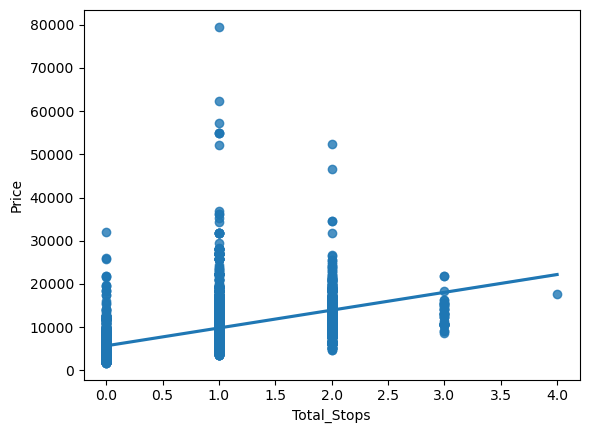

In [47]:
import seaborn as sns
sns.regplot(data=numeric_df,x='Total_Stops',y='Price')

C:\Users\aasha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aasha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total_Stops', ylabel='Price'>

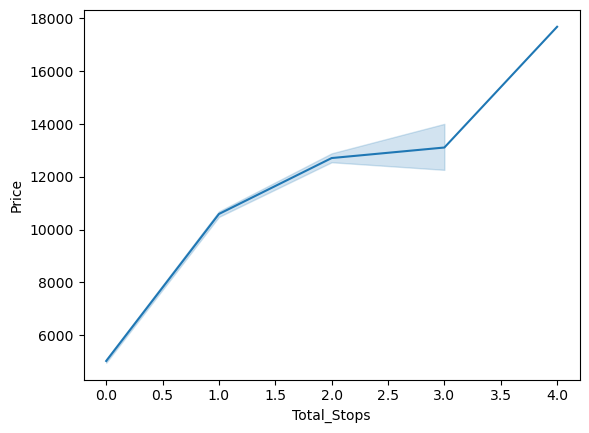

In [48]:
import seaborn as sns
sns.lineplot(data=numeric_df,x='Total_Stops',y='Price')

In [49]:
import numpy as np
numeric_df = final_df.select_dtypes(include=['number'])
corr_matrix=np.round(numeric_df.corr(),2)

<Axes: >

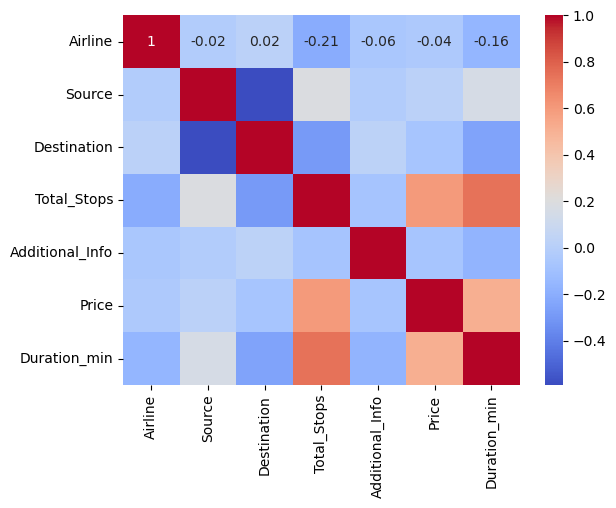

In [50]:
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

In [51]:
final_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min
0,3,0,5,BLR → DEL,0.0,8,3897.0,24,03,2019,22,20,01,10,170
1,1,3,0,CCU → IXR → BBI → BLR,2.0,8,7662.0,1,05,2019,05,50,13,15,445
2,4,2,1,DEL → LKO → BOM → COK,2.0,8,13882.0,9,06,2019,09,25,04,25,1140
3,3,3,0,CCU → NAG → BLR,1.0,8,6218.0,12,05,2019,18,05,23,30,325
4,3,0,5,BLR → NAG → DEL,1.0,8,13302.0,01,03,2019,16,50,21,35,285


In [52]:
numeric_df.shape

(13352, 7)

In [53]:
import numpy as np
mean=np.mean(final_df['Price'])
final_df['Price'].fillna(mean,inplace=True)

In [54]:
final_df['Price']=final_df['Price'].astype(int)

In [55]:
final_df.dropna(inplace=True)

In [56]:
final_df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_min        0
Duration_min       0
dtype: int64

In [57]:
final_df['Total_Stops']=final_df['Total_Stops'].astype(int)
final_df['Date']=final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)
final_df['Dep_hour']=final_df['Dep_hour'].astype(int)
final_df['Dep_min']=final_df['Dep_min'].astype(int)
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_min']=final_df['Arrival_min'].astype(int)

In [58]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13351 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13351 non-null  int32 
 1   Source           13351 non-null  int32 
 2   Destination      13351 non-null  int32 
 3   Route            13351 non-null  object
 4   Total_Stops      13351 non-null  int32 
 5   Additional_Info  13351 non-null  int32 
 6   Price            13351 non-null  int32 
 7   Date             13351 non-null  int32 
 8   Month            13351 non-null  int32 
 9   Year             13351 non-null  int32 
 10  Dep_hour         13351 non-null  int32 
 11  Dep_min          13351 non-null  int32 
 12  Arrival_hour     13351 non-null  int32 
 13  Arrival_min      13351 non-null  int32 
 14  Duration_min     13351 non-null  int32 
dtypes: int32(14), object(1)
memory usage: 938.7+ KB


In [59]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

routes=final_df['Route']
numeric_data=final_df.drop(columns=['Route'])

tf_idf=TfidfVectorizer()
tfidf_matrix=tf_idf.fit_transform(routes)

final_features = hstack([tfidf_matrix, numeric_data.values])

Built a random forest regressor model for predicting prices of flight tickets

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X=final_features
y=final_df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [61]:
predictions=model.predict(X_test)

In [62]:
print(predictions)

[ 4050.  7064.  9086. ... 11150.  7354.  3807.]


In [63]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 250140.81761471357
R-squared: 0.986269975628944


MSE of 271,697.94 means that, on average, the square of the difference between predicted and actual prices is around this value.
If we take the square root of 271,697.94, it gives you an RMSE of approximately 521 (which is a rough estimate of the average prediction error in the same unit as your target, e.g., dollars).
To fully understand this, lets compare it to the scale of your flight prices.

R-squared value of 0.9851 means that approximately 98.51% of the variance in the flight prices is explained by your model. This is a very high value, suggesting that your model fits the data extremely well.
This suggests that your model explains most of the variance in the target variable, which is a strong indication of good performance

In [64]:
mean=np.mean(final_df['Price'])
print(mean)

9086.354505280504


In [65]:
std=np.std(final_df['Price'])
print(std)

4124.116724158546


In [66]:
RMSE=mse**(1/2)
print(RMSE)

500.14079779069573


comparing RMSE and std, it is evident that since RMSE<<std, the model is performing well as the deviation in model is within range of the natural deviation

In [67]:
import joblib
joblib.dump(model,'Flight_Price_Prediction.pkl')

['Flight_Price_Prediction.pkl']

In [68]:
final_df.to_csv('flight_analysed.csv',index=False)

In [70]:
final_df['Airline'].unique()

array([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9])

In [71]:
colu=dict(enumerate(labelencoder.classes_))

In [72]:
print(colu)

{0: '1 Long layover', 1: '1 Short layover', 2: '2 Long layover', 3: 'Business class', 4: 'Change airports', 5: 'In-flight meal not included', 6: 'No Info', 7: 'No check-in baggage included', 8: 'No info', 9: 'Red-eye flight'}
